In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress


# Unclustered Radii

In [34]:
# $ lets you inject a variable into a magic command
# putting f intront lets {i} be treated as a variable and not part of the string
#eval uses the value of the string

radii_dic= {}
for i in range(0, 7):
    x = f'w_{i}_radii'
    %store -r $x
    radii_dic[x] = eval(x)

In [35]:
radii_dic.keys()

dict_keys(['w_0_radii', 'w_1_radii', 'w_2_radii', 'w_3_radii', 'w_4_radii', 'w_5_radii', 'w_6_radii'])

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_89988/141103464.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=15)


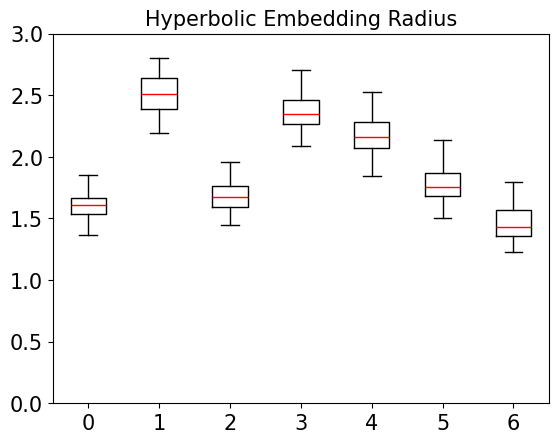

In [55]:
data = list(radii_dic.values())
labels = list(radii_dic.keys())

fig, ax = plt.subplots()
plt.title('Hyperbolic Embedding Radius', size = 15)
ax.boxplot(data, labels = labels, medianprops=dict(color='red'))
ax.set_ylim(0,3)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'], size = 15)
plt.show()
    

In [81]:
%store -r average_clustered_activity

In [82]:
#ratios of activity level by cluster by number of cells
average_clustered_activity

[368.8798414623162,
 408.86759179973296,
 353.9898365493266,
 389.2709847845777,
 391.0693593154354,
 383.10808562598476,
 399.4793066199617]

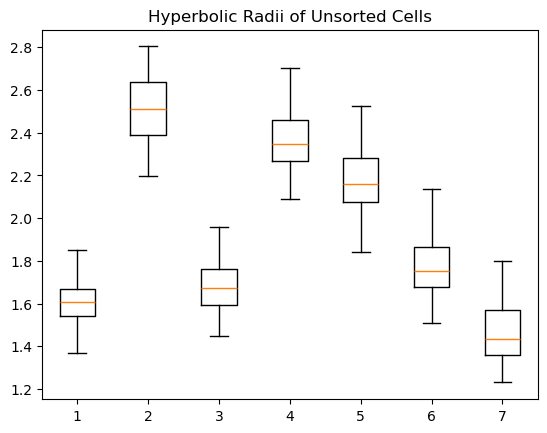

In [92]:
#extract data from boxplot, see if median trends with activity ratio
boxplot_elements = plt.boxplot(data)
plt.title("Hyperbolic Radii of Unsorted Cells")
medians = boxplot_elements['medians']
median_values = [median.get_ydata()[0] for median in medians]


In [87]:
median_values

[1.607201872698037,
 2.5097612292581455,
 1.6716426664635153,
 2.3488743006321307,
 2.1573315848003567,
 1.7517764424553013,
 1.4323657250140183]

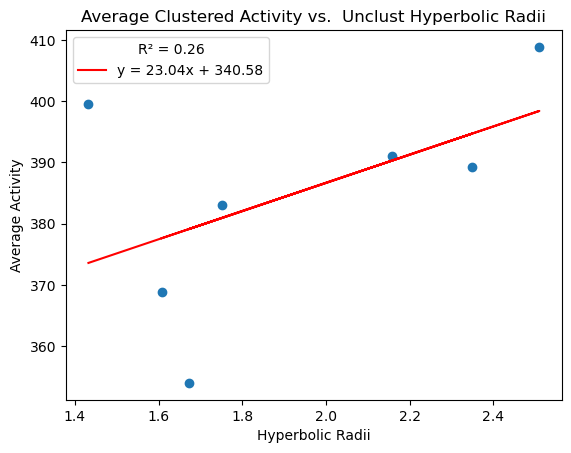

In [99]:
plt.scatter(median_values, average_clustered_activity)
plt.title('Average Clustered Activity vs.  Unclust Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

In [96]:
%store -r average_unclust_activity


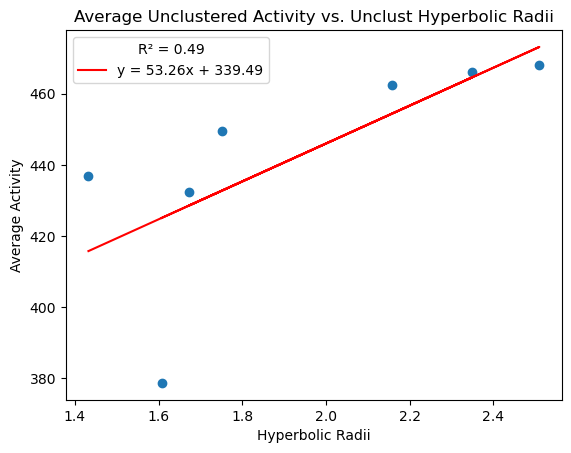

In [100]:
plt.scatter(median_values, average_unclust_activity)
plt.title('Average Unclustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

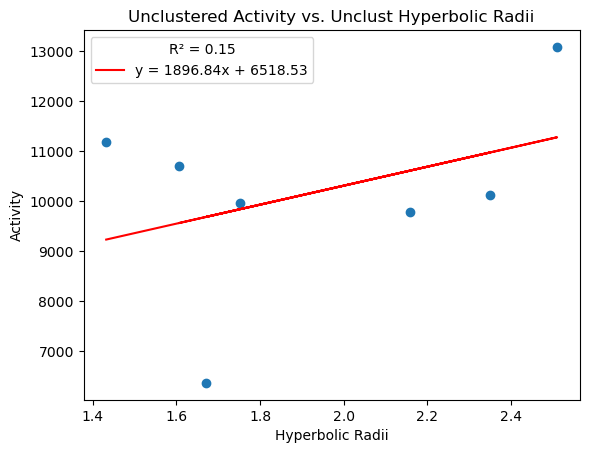

In [102]:
%store -r unclust_activity
plt.scatter(median_values, unclust_activity)
plt.title('Unclustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')


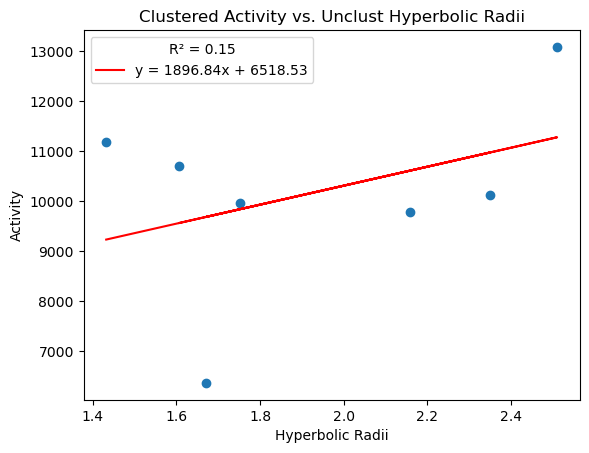

In [104]:
%store -r clustered_activity
plt.scatter(median_values, clustered_activity)
plt.title('Clustered Activity vs. Unclust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')


# clustered radii

In [105]:
clust_radii_dic= {}
for i in range(0, 7):
    x = f'w_{i}_clustered_radii'
    %store -r $x
    clust_radii_dic[x] = eval(x)

/var/folders/4x/v6r504vx43l3xd43p7kmbr400000gn/T/ipykernel_89988/981265982.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticks(), fontsize=15)


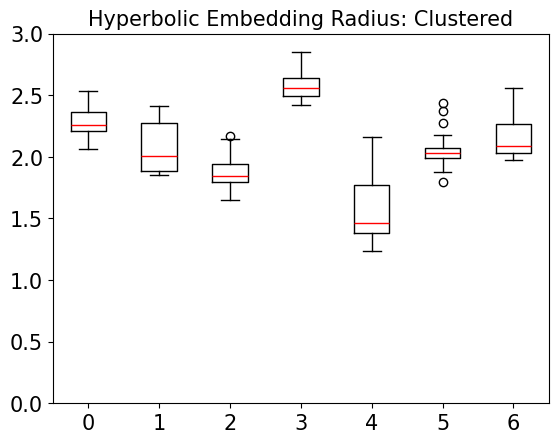

In [106]:
clust_data = list(clust_radii_dic.values())
clust_labels = list(clust_radii_dic.keys())

fig, ax = plt.subplots()
plt.title('Hyperbolic Embedding Radius: Clustered', size = 15)
ax.boxplot(clust_data, labels = clust_labels, medianprops=dict(color='red'))
ax.set_ylim(0,3)
ax.set_yticklabels(ax.get_yticks(), fontsize=15)
ax.set_xticklabels(['0', '1', '2', '3', '4', '5', '6'], size = 15)
plt.show()

Text(0.5, 1.0, 'Hyperbolic Embedding Radius: Clustered')

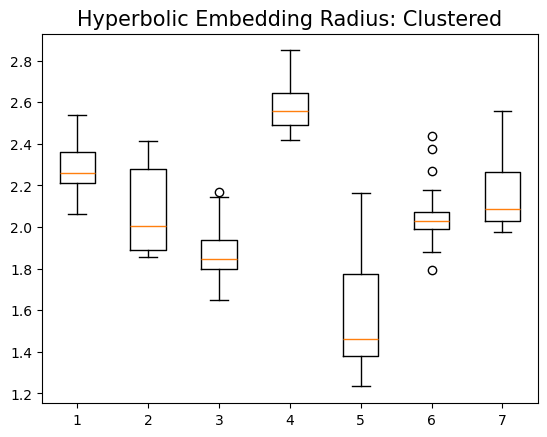

In [107]:
#extract data from boxplot, see if median trends with activity ratio
boxplot_elements = plt.boxplot(clust_data)
medians = boxplot_elements['medians']
median_values = [median.get_ydata()[0] for median in medians]
plt.title('Hyperbolic Embedding Radius: Clustered', size = 15)




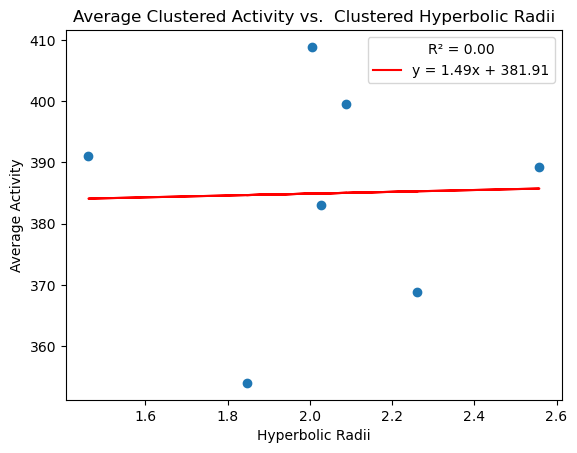

In [108]:
plt.scatter(median_values, average_clustered_activity)
plt.title('Average Clustered Activity vs.  Clustered Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

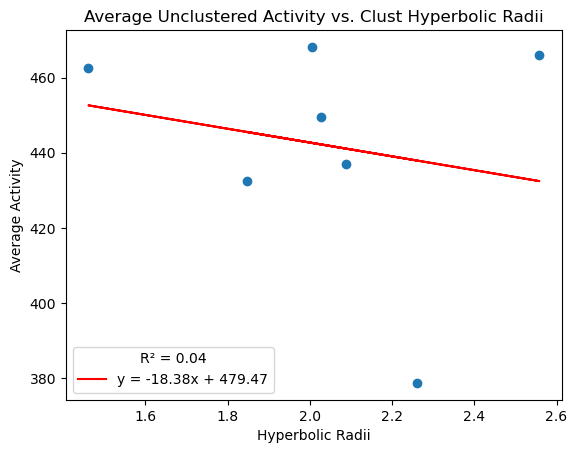

In [109]:
plt.scatter(median_values, average_unclust_activity)
plt.title('Average Unclustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Average Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, average_unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

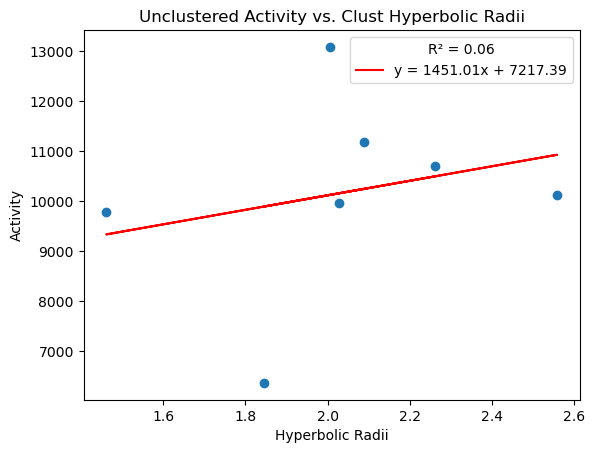

In [110]:
plt.scatter(median_values, unclust_activity)
plt.title('Unclustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, unclust_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')

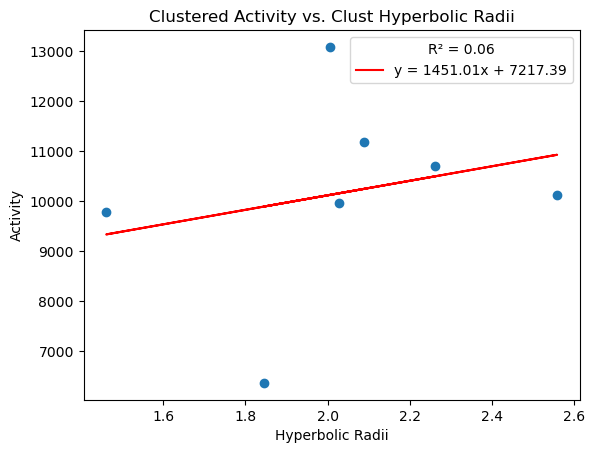

In [111]:
plt.scatter(median_values, clustered_activity)
plt.title('Clustered Activity vs. Clust Hyperbolic Radii')
plt.ylabel('Activity')
plt.xlabel('Hyperbolic Radii')
regression_result = linregress(median_values, clustered_activity)
slope = regression_result.slope
intercept = regression_result.intercept
r_value = regression_result.rvalue  # Pearson's r
r_squared = r_value**2 
# Create a line of best fit
median_values = np.array(median_values, dtype=float)
line = slope * median_values + intercept
plt.plot(median_values, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.legend(title=f'R² = {r_squared:.2f}')